In [ ]:
'''
 * Copyright (c) 2008 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

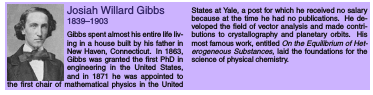

## Metropolis-Hastings Algorithm

###  The Metropolis-Hastings Algorithm

Earlier we introduced the basic Metropolis algorithm without demonstrating that it samples from the required distribution. Before providing a proof, we discuss a generalization known as the **Metropolis-Hastings algorithm** (Hastings, 1970). This algorithm allows for cases where the proposal distribution is not symmetric.

At step $\tau$ of the algorithm, given the current state $z^{(\tau)}$, we:
1. Draw a sample $z^\ast$ from the distribution $q_k(z|z^{(\tau)})$.
2. Accept the sample with probability $A_k(z^\ast, z^{(\tau)})$, where:

$$
A_k(z^\ast, z^{(\tau)}) = \min\left(1, \frac{p(z^\ast) q_k(z^{(\tau)} | z^\ast)}{p(z^{(\tau)}) q_k(z^\ast | z^{(\tau)})}\right)
$$

Here, $k$ labels the possible transitions being considered.

### Key Properties:
- The evaluation of the acceptance criterion does **not** require knowledge of the normalizing constant $Z_p$ in $p(z) = \frac{\tilde{p}(z)}{Z_p}$.
- For a symmetric proposal distribution, the Metropolis-Hastings criterion reduces to the **standard Metropolis criterion**.

### Proof of Invariance:
To show that $p(z)$ is an invariant distribution of the Markov chain defined by the Metropolis-Hastings algorithm, we verify the detailed balance condition:

$$
p(z) q_k(z | z^\ast) A_k(z^\ast, z) = p(z^\ast) q_k(z^\ast | z) A_k(z, z^\ast)
$$

Using the definition of $A_k$:

$$
p(z) q_k(z | z^\ast) A_k(z^\ast, z) = \min(p(z) q_k(z | z^\ast), p(z^\ast) q_k(z^\ast | z))
$$

$$
p(z^\ast) q_k(z^\ast | z) A_k(z, z^\ast) = \min(p(z^\ast) q_k(z^\ast | z), p(z) q_k(z | z^\ast))
$$

Thus, detailed balance is satisfied.

### Performance Considerations:
The choice of proposal distribution $q_k$ significantly affects performance:
- **Small variance** in the proposal distribution leads to high acceptance rates but slow exploration (random walk behavior).
- **Large variance** increases rejection rates, especially in complex distributions where many proposed states have low probability.

#### Example: Multivariate Gaussian Distribution
For a multivariate Gaussian distribution with strong correlations, an isotropic Gaussian proposal distribution (scale $\rho$) can be used. To minimize the rejection rate:
- Choose $\rho$ comparable to the smallest standard deviation, $\sigma_{\min}$.
- The number of steps to obtain independent samples scales as $\left(\frac{\sigma_{\max}}{\sigma_{\min}}\right)^2$, where $\sigma_{\max}$ is the largest standard deviation.

---

## Gibbs Sampling



Gibbs sampling (Geman and Geman, 1984) is a special case of the Metropolis-Hastings algorithm, designed for conditional sampling in high-dimensional spaces.

### Algorithm Description:
Suppose we wish to sample from $p(z) = p(z_1, z_2, \dots, z_M)$, and an initial state of the Markov chain is given. Each step involves:
1. Selecting a variable $z_i$.
2. Sampling $z_i$ from its conditional distribution $p(z_i | z_{\setminus i})$, where $z_{\setminus i}$ represents all other variables.

#### Example:
Consider $p(z_1, z_2, z_3)$. At step $\tau$:
1. Sample $z_1^{(\tau+1)}$ from $p(z_1 | z_2^{(\tau)}, z_3^{(\tau)})$.
2. Sample $z_2^{(\tau+1)}$ from $p(z_2 | z_1^{(\tau+1)}, z_3^{(\tau)})$.
3. Sample $z_3^{(\tau+1)}$ from $p(z_3 | z_1^{(\tau+1)}, z_2^{(\tau+1)})$.

This procedure cycles through all variables.

### Steps:
1. Initialize $\{z_i : i = 1, \dots, M\}$.
2. For $\tau = 1, \dots, T$:
   - Sample $z_1^{(\tau+1)} \sim p(z_1 | z_2^{(\tau)}, z_3^{(\tau)}, \dots, z_M^{(\tau)})$.
   - Sample $z_2^{(\tau+1)} \sim p(z_2 | z_1^{(\tau+1)}, z_3^{(\tau)}, \dots, z_M^{(\tau)})$.
   - $\dots$
   - Sample $z_M^{(\tau+1)} \sim p(z_M | z_1^{(\tau+1)}, z_2^{(\tau+1)}, \dots, z_{M-1}^{(\tau+1)})$.
   
   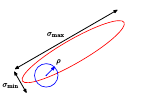
   
   Fig.10 Schematic illustration of the use of an isotropic Gaussian proposal distribution (blue circle) to sample from a correlated multivariate Gaussian distribution (red ellipse) having very different stan- dard deviations in different directions, using the Metropolis-Hastings algorithm. In order to keep the rejection rate low, the scale ρ of the proposal distribution should be on the order of the smallest standard deviation σmin , which leads to random walk behaviour in which the number of steps sep- arating states that are approximately independent is of order (σmax /σmin )2 where σmax is the largest standard deviation.
   


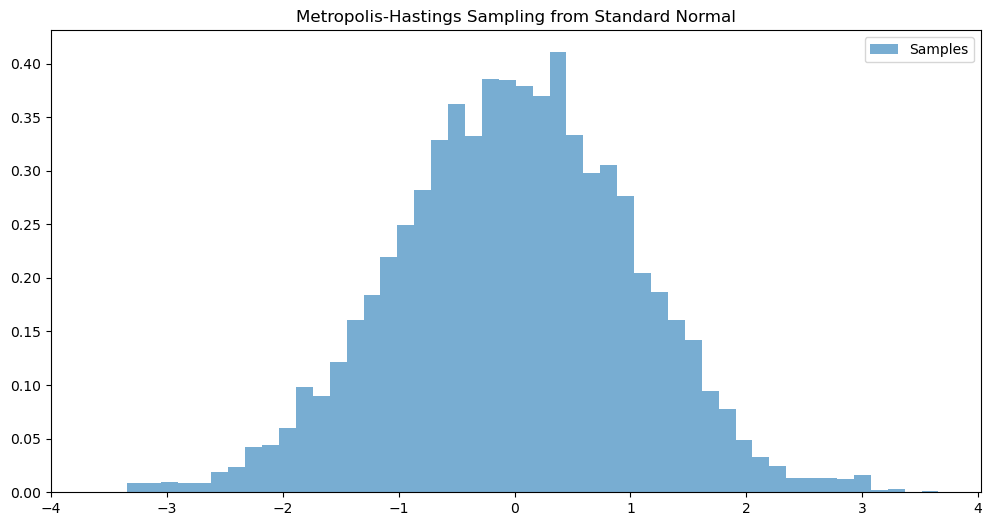

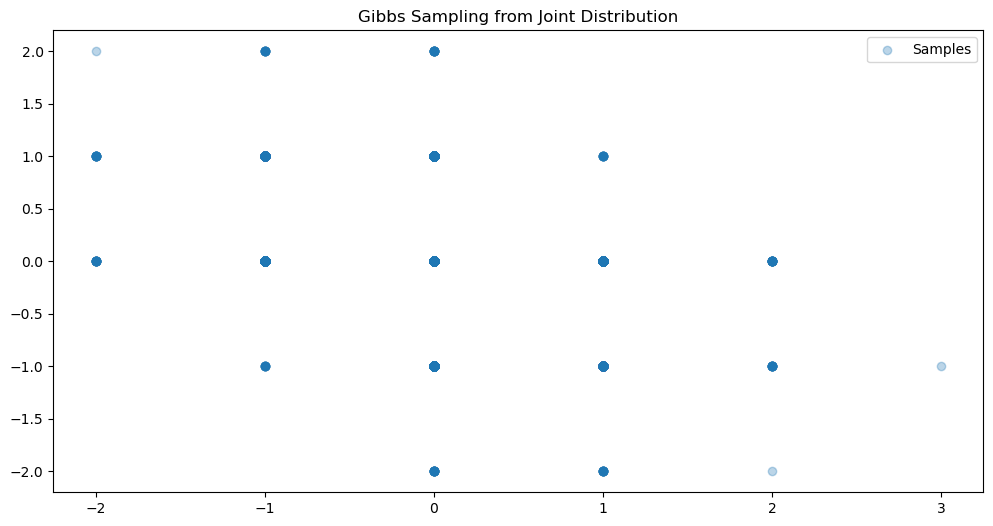

In [1]:
import numpy as np

def metropolis_hastings(p, q, q_sample, initial_state, n_samples):
    """
    Metropolis-Hastings algorithm.

    Parameters:
        p (function): Target distribution (unnormalized probability density function).
        q (function): Proposal distribution probability q(z_new | z_current).
        q_sample (function): Function to sample from the proposal distribution.
        initial_state (float or np.ndarray): Initial state of the chain.
        n_samples (int): Number of samples to generate.

    Returns:
        np.ndarray: Array of samples.
    """
    samples = [initial_state]
    current_state = initial_state

    for _ in range(n_samples - 1):
        proposed_state = q_sample(current_state)
        acceptance_ratio = min(
            1, (p(proposed_state) * q(current_state, proposed_state)) / (p(current_state) * q(proposed_state, current_state))
        )

        if np.random.rand() < acceptance_ratio:
            current_state = proposed_state

        samples.append(current_state)

    return np.array(samples)

def gibbs_sampling(joint_conditional_distributions, initial_state, n_samples):
    """
    Gibbs sampling algorithm.

    Parameters:
        joint_conditional_distributions (list of functions): List of conditional distributions for each variable.
        initial_state (np.ndarray): Initial state of the variables.
        n_samples (int): Number of samples to generate.

    Returns:
        np.ndarray: Array of samples with shape (n_samples, n_variables).
    """
    n_variables = len(joint_conditional_distributions)
    samples = np.zeros((n_samples, n_variables))
    current_state = np.array(initial_state)

    for i in range(n_samples):
        for j in range(n_variables):
            current_state[j] = joint_conditional_distributions[j](current_state)
        samples[i, :] = current_state

    return samples

# Example Usage:

# Metropolis-Hastings Example
# Target distribution: standard normal
p = lambda z: np.exp(-z**2 / 2)  # Unnormalized target distribution
q = lambda z_new, z_current: 1   # Symmetric proposal distribution
q_sample = lambda z: z + np.random.normal(0, 1)  # Gaussian proposal distribution

mh_samples = metropolis_hastings(p, q, q_sample, initial_state=0, n_samples=10000)

# Gibbs Sampling Example
# Target: Joint distribution of two variables, p(x, y) ~ exp(-x^2 - y^2 - xy)
conditional_x = lambda state: np.random.normal(-state[1] / 2, 1 / np.sqrt(2))
conditional_y = lambda state: np.random.normal(-state[0] / 2, 1 / np.sqrt(2))

joint_conditionals = [conditional_x, conditional_y]
initial_state = [0, 0]

gibbs_samples = gibbs_sampling(joint_conditionals, initial_state, n_samples=10000)

# Visualization
import matplotlib.pyplot as plt

# Metropolis-Hastings Results
plt.figure(figsize=(12, 6))
plt.hist(mh_samples, bins=50, density=True, alpha=0.6, label="Samples")
plt.title("Metropolis-Hastings Sampling from Standard Normal")
plt.legend()
plt.show()

# Gibbs Sampling Results
plt.figure(figsize=(12, 6))
plt.scatter(gibbs_samples[:, 0], gibbs_samples[:, 1], alpha=0.3, label="Samples")
plt.title("Gibbs Sampling from Joint Distribution")
plt.legend()
plt.show()


In [2]:
import random
import math

def metropolis_hastings(p, q, q_sample, initial_state, n_samples):
    """
    Metropolis-Hastings algorithm.

    Parameters:
        p (function): Target distribution (unnormalized probability density function).
        q (function): Proposal distribution probability q(z_new | z_current).
        q_sample (function): Function to sample from the proposal distribution.
        initial_state (float): Initial state of the chain.
        n_samples (int): Number of samples to generate.

    Returns:
        list: List of samples.
    """
    samples = [initial_state]
    current_state = initial_state

    for _ in range(n_samples - 1):
        proposed_state = q_sample(current_state)
        acceptance_ratio = min(
            1, (p(proposed_state) * q(current_state, proposed_state)) / (p(current_state) * q(proposed_state, current_state))
        )

        if random.random() < acceptance_ratio:
            current_state = proposed_state

        samples.append(current_state)

    return samples

def gibbs_sampling(joint_conditional_distributions, initial_state, n_samples):
    """
    Gibbs sampling algorithm.

    Parameters:
        joint_conditional_distributions (list of functions): List of conditional distributions for each variable.
        initial_state (list): Initial state of the variables.
        n_samples (int): Number of samples to generate.

    Returns:
        list: List of samples, where each sample is a list of variable values.
    """
    n_variables = len(joint_conditional_distributions)
    samples = []
    current_state = initial_state[:]

    for _ in range(n_samples):
        for j in range(n_variables):
            current_state[j] = joint_conditional_distributions[j](current_state)
        samples.append(current_state[:])

    return samples

# Example Usage:

# Metropolis-Hastings Example
# Target distribution: standard normal
p = lambda z: math.exp(-z**2 / 2)  # Unnormalized target distribution
q = lambda z_new, z_current: 1     # Symmetric proposal distribution
q_sample = lambda z: z + random.gauss(0, 1)  # Gaussian proposal distribution

mh_samples = metropolis_hastings(p, q, q_sample, initial_state=0, n_samples=10000)

# Gibbs Sampling Example
# Target: Joint distribution of two variables, p(x, y) ~ exp(-x^2 - y^2 - xy)
def conditional_x(state):
    return random.gauss(-state[1] / 2, math.sqrt(1 / 2))

def conditional_y(state):
    return random.gauss(-state[0] / 2, math.sqrt(1 / 2))

joint_conditionals = [conditional_x, conditional_y]
initial_state = [0, 0]

gibbs_samples = gibbs_sampling(joint_conditionals, initial_state, n_samples=10000)

# Display Results
print("Metropolis-Hastings Samples (first 10):", mh_samples[:10])
print("Gibbs Sampling Samples (first 10):", gibbs_samples[:10])


Metropolis-Hastings Samples (first 10): [0, -0.8929368720440517, -0.4216039104208159, -0.5236575883744942, -0.3845978090352207, -0.3845978090352207, -0.3845978090352207, 0.3595530485538627, 0.3595530485538627, -1.0123834185459173]
Gibbs Sampling Samples (first 10): [[-0.13244659900391087, 1.6797725819047087], [-0.1092550953709498, 0.30425684764871075], [-1.4935255240159717, 1.1093193029488435], [0.9633787868019201, -0.34892155462510077], [0.8230712075573733, -0.8235861493993386], [1.2307904400899008, -1.104042094517501], [0.9477762154037894, -1.7197779488300031], [0.8693072498651014, -1.6088237601458448], [1.425978560768994, -0.030007640125636725], [0.7464281185181894, -0.7917547321636105]]


In [ ]:
import random
import math
import turtle

def metropolis_hastings(p, q, q_sample, initial_state, n_samples):
    """
    Metropolis-Hastings algorithm.

    Parameters:
        p (function): Target distribution (unnormalized probability density function).
        q (function): Proposal distribution probability q(z_new | z_current).
        q_sample (function): Function to sample from the proposal distribution.
        initial_state (float): Initial state of the chain.
        n_samples (int): Number of samples to generate.

    Returns:
        list: List of samples.
    """
    samples = [initial_state]
    current_state = initial_state

    for _ in range(n_samples - 1):
        proposed_state = q_sample(current_state)
        acceptance_ratio = min(
            1, (p(proposed_state) * q(current_state, proposed_state)) / (p(current_state) * q(proposed_state, current_state))
        )

        if random.random() < acceptance_ratio:
            current_state = proposed_state

        samples.append(current_state)

    return samples

def gibbs_sampling(joint_conditional_distributions, initial_state, n_samples):
    """
    Gibbs sampling algorithm.

    Parameters:
        joint_conditional_distributions (list of functions): List of conditional distributions for each variable.
        initial_state (list): Initial state of the variables.
        n_samples (int): Number of samples to generate.

    Returns:
        list: List of samples, where each sample is a list of variable values.
    """
    n_variables = len(joint_conditional_distributions)
    samples = []
    current_state = initial_state[:]

    for _ in range(n_samples):
        for j in range(n_variables):
            current_state[j] = joint_conditional_distributions[j](current_state)
        samples.append(current_state[:])

    return samples

def plot_metropolis_hastings(samples):
    """Visualize the Metropolis-Hastings samples using turtle graphics."""
    screen = turtle.Screen()
    screen.title("Metropolis-Hastings Visualization")
    screen.setworldcoordinates(0, min(samples) - 1, len(samples), max(samples) + 1)

    plotter = turtle.Turtle()
    plotter.speed(0)
    plotter.penup()

    for i, sample in enumerate(samples):
        plotter.goto(i, sample)
        plotter.pendown()

    screen.mainloop()

def plot_gibbs_sampling(samples):
    """Visualize the Gibbs sampling results in 2D using turtle graphics."""
    screen = turtle.Screen()
    screen.title("Gibbs Sampling Visualization")
    screen.setworldcoordinates(
        min(s[0] for s in samples) - 1,
        min(s[1] for s in samples) - 1,
        max(s[0] for s in samples) + 1,
        max(s[1] for s in samples) + 1
    )

    plotter = turtle.Turtle()
    plotter.speed(0)
    plotter.penup()

    for sample in samples:
        plotter.goto(sample[0], sample[1])
        plotter.dot(3)

    screen.mainloop()

# Example Usage:

# Metropolis-Hastings Example
# Target distribution: standard normal
p = lambda z: math.exp(-z**2 / 2)  # Unnormalized target distribution
q = lambda z_new, z_current: 1     # Symmetric proposal distribution
q_sample = lambda z: z + random.gauss(0, 1)  # Gaussian proposal distribution

mh_samples = metropolis_hastings(p, q, q_sample, initial_state=0, n_samples=500)

# Gibbs Sampling Example
# Target: Joint distribution of two variables, p(x, y) ~ exp(-x^2 - y^2 - xy)
def conditional_x(state):
    return random.gauss(-state[1] / 2, math.sqrt(1 / 2))

def conditional_y(state):
    return random.gauss(-state[0] / 2, math.sqrt(1 / 2))

joint_conditionals = [conditional_x, conditional_y]
initial_state = [0, 0]

gibbs_samples = gibbs_sampling(joint_conditionals, initial_state, n_samples=500)

# Plot the results
plot_metropolis_hastings(mh_samples)
plot_gibbs_sampling(gibbs_samples)


![image-2.png](attachment:image-2.png)

Fig.11 Illustration of Gibbs sampling by alter- nate updates of two variables whose distribution is a correlated Gaussian. The step size is governed by the stan- dard deviation of the conditional distri- bution (green curve), and is O(l), lead- ing to slow progress in the direction of elongation of the joint distribution (red ellipse). The number of steps needed to obtain an independent sample from the distribution is O((L/l)2 ).

## Gibbs Sampling: Theory and Implementation

### Overview

To demonstrate that Gibbs sampling correctly samples from the required distribution, we begin by noting two key properties:

1. **Invariant Distribution**:
    - The joint distribution $p(z)$ remains invariant under Gibbs sampling steps.
    - Sampling $z_i$ from $p(z_i | z_{\backslash i})$ keeps the marginal $p(z_{\backslash i})$ unchanged since $z_{\backslash i}$ is not updated.
    - Together, the conditional and marginal distributions specify the joint distribution, ensuring invariance.

2. **Ergodicity**:
    - For Gibbs sampling to be ergodic, none of the conditional distributions can be zero.
    - This ensures that any point in the $z$-space can be reached from another via a finite number of steps, updating each component variable.

### Algorithm

1. **Initialization**:
   - Specify an initial state $\{z_i : i = 1, \ldots, M\}$.

2. **Iteration**:
   - For $t = 1, \ldots, T$:
     
$$
\begin{align*}
& z_1^{(t+1)} \sim p(z_1 | z_2^{(t)}, \ldots, z_M^{(t)}) \\
& z_2^{(t+1)} \sim p(z_2 | z_1^{(t+1)}, z_3^{(t)}, \ldots, z_M^{(t)}) \\
& \vdots \\
& z_M^{(t+1)} \sim p(z_M | z_1^{(t+1)}, \ldots, z_{M-1}^{(t+1)})
\end{align*}
$$

3. **Output**:
   - Subsample after a sufficient number of iterations to obtain nearly independent samples.

### Practical Insights

- **Correlated Gaussians**:
    - In the case of a 2D correlated Gaussian with widths $l$ (conditional) and $L$ (marginal):
      - Step size: $O(l)$
      - Steps for independent samples: $O((L/l)^2)$
    - For uncorrelated Gaussians, Gibbs sampling is optimally efficient.

- **Over-Relaxation**:
    - For distributions with Gaussian conditionals:
      
$$
z_i^\prime = \mu_i + \alpha(z_i - \mu_i) + \sigma_i \sqrt{1 - \alpha^2} \nu, \quad \nu \sim \mathcal{N}(0, 1), \quad -1 < \alpha < 1
$$
    
      - Encourages directed motion in highly correlated spaces.

- **Graphical Models**:
    - For graphical models, the conditional distribution depends on the Markov blanket:
      - **Undirected Graph**: Neighbors of the node.
      - **Directed Graph**: Parents, children, and co-parents.

### Implementation





![image.png](attachment:image.png)

Fig.12 The Gibbs sampling method requires samples to be drawn from the conditional distribution of a variable condi- tioned on the remaining variables. For graphical models, this conditional distribution is a function only of the states of the nodes in the Markov blanket. For an undirected graph this com- prises the set of neighbours, as shown on the left, while for a directed graph the Markov blanket comprises the parents, the children, and the co-parents, as shown on the right.

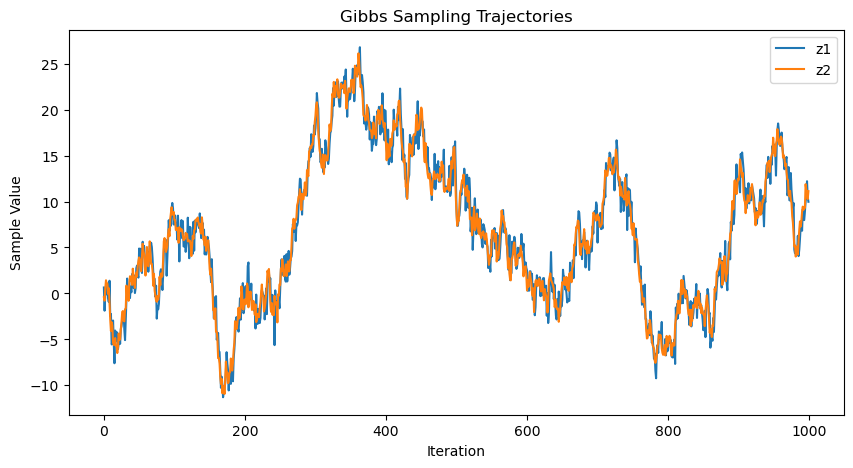

In [8]:
#```python
def gibbs_sampling(target_conditionals, initial_state, iterations):
    """
    Perform Gibbs sampling.
    
    Parameters:
    - target_conditionals: List of conditional distributions p(z_i | z\i).
    - initial_state: List of initial values for the variables [z1, z2, ..., zM].
    - iterations: Number of iterations.
    
    Returns:
    - samples: List of samples for each variable.
    """
    state = initial_state[:]
    samples = []

    for _ in range(iterations):
        for i, conditional in enumerate(target_conditionals):
            state[i] = conditional(state)  # Sample from the i-th conditional
        samples.append(state[:])

    return samples

# Example Usage
def example_conditional(state):
    """Example conditional distribution p(z1 | z2)."""
    z2 = state[1]
    return random.gauss(mu=z2, sigma=1)  # Example: Gaussian conditional

initial = [0, 0]  # Initial state
conditionals = [example_conditional, example_conditional]  # Mock conditionals
result = gibbs_sampling(conditionals, initial, 1000)
#```

### Visualization

#Using graphical tools to observe sampling trajectories and convergence.

#```python
import matplotlib.pyplot as plt

def plot_gibbs_results(samples):
    """Plot the Gibbs sampling trajectory."""
    samples = list(zip(*samples))
    plt.figure(figsize=(10, 5))

    for i, dim_samples in enumerate(samples):
        plt.plot(dim_samples, label=f'z{i+1}')

    plt.xlabel('Iteration')
    plt.ylabel('Sample Value')
    plt.title('Gibbs Sampling Trajectories')
    plt.legend()
    plt.show()

# Visualize
plot_gibbs_results(result)


## Slice Sampling

Slice sampling is an adaptive MCMC technique that adjusts the step size automatically based on the characteristics of the target distribution. Here's an explanation and implementation in Jupyter Notebook format with LaTeX-rendered equations and Python code.

---

## Slice Sampling: Theoretical Explanation

### Goal:
To sample from a univariate probability distribution $ p(z) $, we augment the space with an auxiliary variable $ u $. We then sample from the joint distribution:

$$
p(z, u) =
\begin{cases} 
\frac{1}{Z_p}, & \text{if } 0 \leq u \leq \tilde{p}(z) \\
0, & \text{otherwise}
\end{cases}
$$

where $ \tilde{p}(z) $ is the unnormalized distribution and $ Z_p = \int \tilde{p}(z) \, dz $.

The marginal distribution over $ z $ is:

$$
p(z) = \int_0^{\tilde{p}(z)} \frac{1}{Z_p} \, du = \frac{\tilde{p}(z)}{Z_p}.
$$

Thus, we can sample from $ p(z) $ by sampling from $ p(z, u) $ and ignoring $ u $.

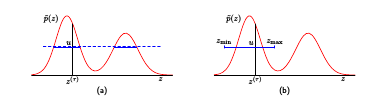

Fig.13 Illustration of slice sampling. (a) For a given value z (τ ) , a value of u is chosen uniformly in the region 0 � u � e p(z (τ ) ), which then deﬁnes a ‘slice’ through the distribution, shown by the solid horizontal lines. (b) Because it is infeasible to sample directly from a slice, a new sample of z is drawn from a region zmin � z � zmax , which contains the previous value z (τ ) .

### Procedure:
1. **Sample $ u $**:
   - Uniformly from $ [0, \tilde{p}(z)] $.
2. **Sample $ z $**:
   - Uniformly from the slice $ \{ z : \tilde{p}(z) > u \} $.

This approach is illustrated below:
- A slice is defined by $ 0 \leq u \leq \tilde{p}(z) $.
- A candidate $ z $ is sampled from a region containing the slice.

---

### Practical Implementation
The region for sampling $ z $ is adaptively determined:
1. Start with an initial region of width $ w $ around the current $ z^{(\tau)} $.
2. Expand the region $ [z_\text{min}, z_\text{max}] $ incrementally until it fully encompasses the slice.
3. Draw a candidate $ z^* $ uniformly from the region.
4. If $ z^* $ lies outside the slice, shrink the region and repeat until $ z^* $ is accepted.

---




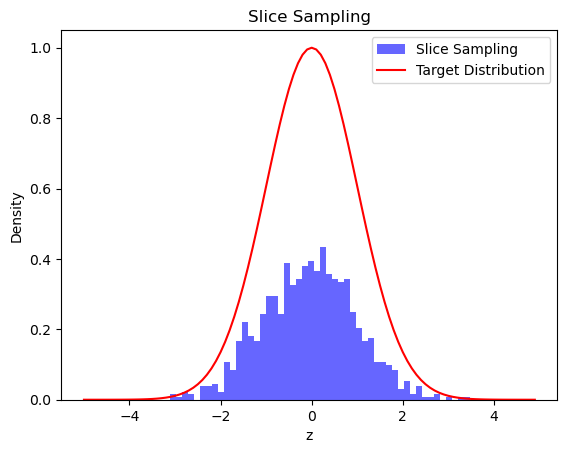

In [9]:
## Python Implementation
# Below is a Python implementation of the univariate slice sampling algorithm.


import matplotlib.pyplot as plt
import random
import math

# Target unnormalized probability density function
def target_distribution(z):
    return math.exp(-z**2 / 2)

# Slice sampling algorithm
def slice_sampling(initial_z, n_samples, width):
    samples = []
    z = initial_z

    for _ in range(n_samples):
        # Step 1: Sample u
        u = random.uniform(0, target_distribution(z))

        # Step 2: Define initial region
        z_min = z - width / 2
        z_max = z + width / 2

        # Expand the region
        while target_distribution(z_min) > u:
            z_min -= width
        while target_distribution(z_max) > u:
            z_max += width

        # Step 3: Sample z uniformly within the region
        while True:
            z_candidate = random.uniform(z_min, z_max)
            if target_distribution(z_candidate) > u:
                z = z_candidate
                break
            else:
                # Shrink the region
                if z_candidate < z:
                    z_min = z_candidate
                else:
                    z_max = z_candidate

        samples.append(z)

    return samples

# Generate samples using slice sampling
initial_z = 0.0
n_samples = 1000
width = 1.0
samples = slice_sampling(initial_z, n_samples, width)

# Plot the histogram of samples
plt.hist(samples, bins=50, density=True, alpha=0.6, color="blue", label="Slice Sampling")
z_vals = [i * 0.1 for i in range(-50, 50)]
plt.plot(z_vals, [target_distribution(z) for z in z_vals], color="red", label="Target Distribution")
plt.title("Slice Sampling")
plt.xlabel("z")
plt.ylabel("Density")
plt.legend()
plt.show()

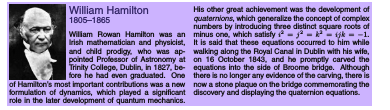



## Hybrid Monte Carlo Algorithm in Jupyter Notebook

The **Hybrid Monte Carlo (HMC)** algorithm addresses the limitations of the Metropolis algorithm, such as slow exploration due to random walk behavior. By leveraging ideas from Hamiltonian dynamics, HMC makes large state-space transitions efficiently, with a low rejection rate.

---

### Dynamical Systems

### Hamiltonian Dynamics
Hamiltonian dynamics is central to HMC, describing the evolution of a system in **phase space**, consisting of:
- **Position variables**: $ z = \{ z_i \} $
- **Momentum variables**: $ r = \{ r_i \} $

The **Hamiltonian** is the total energy:

$$
H(z, r) = E(z) + K(r),
$$

where:
- $ E(z) $ is the **potential energy**: $ E(z) = -\log p(z) $,
- $ K(r) $ is the **kinetic energy**: 

$$
K(r) = \frac{1}{2} \| r \|^2 = \frac{1}{2} \sum_i r_i^2.
$$

### Hamiltonian Equations
The dynamics are described by the following coupled differential equations:

$$
\frac{d z_i}{d \tau} = \frac{\partial H}{\partial r_i}, \quad \frac{d r_i}{d \tau} = -\frac{\partial H}{\partial z_i}.
$$

These equations ensure:
1. **Conservation of Energy**: $ H(z, r) $ is invariant over time.
2. **Liouville's Theorem**: Volume in phase space is preserved.

### Probability Distribution
The joint distribution over phase space is:

$$
p(z, r) = \frac{1}{Z_H} \exp(-H(z, r)),
$$

where $ Z_H $ is the normalizing constant. Hamiltonian dynamics leaves this distribution invariant, enabling systematic exploration of the state space.

---

## Hybrid Monte Carlo Algorithm

### Objective
To sample from $ p(z) $, the marginal distribution over $ z $, by simulating the Hamiltonian dynamics and introducing updates that ensure ergodicity.

### Steps
1. **Augment the state with momentum $ r $**:
   - Draw $ r \sim \mathcal{N}(0, I) $, ensuring the joint $ p(z, r) $ is sampled.

2. **Simulate Hamiltonian dynamics**:
   - Evolve $ z $ and $ r $ over a time interval using a numerical integration method (e.g., Leapfrog).

3. **Metropolis acceptance step**:
   - Compute the Hamiltonian $ H(z, r) $ before and after simulation.
   - Accept or reject the new state $ (z', r') $ with probability:

$$
P_\text{accept} = \min\left(1, \exp(H(z, r) - H(z', r'))\right).
$$

4. **Repeat**:
   - Introduce randomness by resampling $ r $.

---



## Hamiltonian Dynamics: A Reformulation of Stochastic Sampling

### Introduction
Hamiltonian dynamics is a framework that describes the evolution of systems in **phase space**, consisting of:
- **Position variables**: $ z = \{ z_i \} $,
- **Momentum variables**: $ r = \{ r_i \} $.

The **Hamiltonian** is the total energy of the system, comprising **potential energy** and **kinetic energy**.

---

## Probability Distribution

We start with the target probability distribution:

$$
p(z) = \frac{1}{Z_p} \exp(-E(z)),
$$

where:
- $ E(z) $ is the **potential energy**.
- $ Z_p $ is the normalizing constant.

---

## Dynamics of the System

### Acceleration and Force
The acceleration of the system, equivalent to the rate of change of momentum $ r $, is proportional to the applied force:

$$
\frac{d r_i}{d \tau} = -\frac{\partial E(z)}{\partial z_i}.
$$

Here, $ \frac{\partial E(z)}{\partial z_i} $ is the gradient of the potential energy, often called the force.

### Kinetic Energy
The kinetic energy is given by:

$$
K(r) = \frac{1}{2} \| r \|^2 = \frac{1}{2} \sum_i r_i^2.
$$

---

## Hamiltonian

The **Hamiltonian**, representing the total energy of the system, is defined as:

$$
H(z, r) = E(z) + K(r).
$$

---

## Hamiltonian Equations of Motion

Using the Hamiltonian, the system dynamics can be expressed as coupled first-order differential equations:

$$
\frac{d z_i}{d \tau} = \frac{\partial H}{\partial r_i}, \quad \frac{d r_i}{d \tau} = -\frac{\partial H}{\partial z_i}.
$$

These equations describe how the position $ z $ and momentum $ r $ evolve over time $ \tau $.

---

## Conservation Properties

1. **Conservation of Energy**:
   The Hamiltonian $ H(z, r) $ remains constant over time, ensuring that the system conserves total energy.

2. **Conservation of Phase Space Volume**:
   The system preserves the volume in phase space (Liouville's Theorem).



## Conservation Properties of Hamiltonian Dynamics

### 1. Conservation of Hamiltonian
During the evolution of the system, the Hamiltonian $ H(z, r) $ remains constant. This can be demonstrated through differentiation:

$$
\frac{dH}{d\tau} = \sum_i \left( \frac{\partial H}{\partial z_i} \frac{d z_i}{d\tau} + \frac{\partial H}{\partial r_i} \frac{d r_i}{d\tau} \right).
$$

Substituting the Hamiltonian equations of motion:

$$
\frac{d z_i}{d \tau} = \frac{\partial H}{\partial r_i}, \quad \frac{d r_i}{d \tau} = -\frac{\partial H}{\partial z_i},
$$

we have:

$$
\frac{dH}{d\tau} = \sum_i \left( \frac{\partial H}{\partial z_i} \frac{\partial H}{\partial r_i} - \frac{\partial H}{\partial r_i} \frac{\partial H}{\partial z_i} \right) = 0.
$$

Thus, the Hamiltonian is conserved over time.

---

### 2. Conservation of Phase Space Volume (Liouville's Theorem)
Hamiltonian systems preserve the volume in phase space. That is, as the system evolves, the volume of any region in the space of $ (z, r) $ remains constant. 

The rate of change in phase space is given by the flow field:

$$
V = \begin{bmatrix} \frac{d z}{d \tau} \\ \frac{d r}{d \tau} \end{bmatrix}.
$$

The divergence of this flow field is:

$$
\text{div} \, V = \sum_i \left( \frac{\partial}{\partial z_i} \frac{d z_i}{d\tau} + \frac{\partial}{\partial r_i} \frac{d r_i}{d\tau} \right).
$$

Using the Hamiltonian equations:

$$
\frac{d z_i}{d \tau} = \frac{\partial H}{\partial r_i}, \quad \frac{d r_i}{d \tau} = -\frac{\partial H}{\partial z_i},
$$

we find:

$$
\text{div} \, V = \sum_i \left( \frac{\partial^2 H}{\partial z_i \partial r_i} - \frac{\partial^2 H}{\partial r_i \partial z_i} \right) = 0.
$$

This shows that the volume in phase space is conserved.

---

## Joint Distribution in Phase Space
The joint probability distribution over phase space is defined as:

$$
p(z, r) = \frac{1}{Z_H} \exp(-H(z, r)),
$$

where:
- $ Z_H $ is the normalization constant.

Using the conservation of $ H $ and phase space volume, we see that the Hamiltonian dynamics leaves $ p(z, r) $ invariant. This can be understood as follows:
- Over a small region where $ H$ is approximately constant, the volume remains unchanged.
- Since $ p(z, r) $ depends only on $ H $, its density remains constant.

---

## Large Changes in State Space
Although $ H $ is invariant, the positions $ z $ and momenta $ r $ evolve, enabling the system to explore the state space systematically. This avoids the **random walk behavior** observed in simpler sampling methods like the Metropolis algorithm.

---

## Achieving Ergodicity
To ensure ergodic sampling (i.e., the ability to sample the entire state space), additional steps are required:
1. Replace $ r $ with a new value sampled from its conditional distribution $ p(r | z) $, which corresponds to a Gibbs sampling step.
2. This step changes $ H $, allowing the system to explore the phase space fully while still preserving the distribution $ p(z, r) $.

## Numerical Integration of Hamiltonian Dynamics

### 1. Conditional Distribution of Momentum
In Section 11.3, it is shown that resampling the momentum $ r $ from its conditional distribution $ p(r | z) $ leaves the desired distribution $ p(z, r) $ invariant. Since $ z $ and $ r $ are independent under $ p(z, r) $, the conditional distribution $ p(r | z) $ is Gaussian and straightforward to sample from.

---

### 2. Numerical Integration: Leapfrog Discretization
Hamiltonian equations need to be integrated numerically. This introduces errors, but **leapfrog discretization** provides a scheme that minimizes their impact while preserving phase-space volume (Liouville’s theorem).

The leapfrog update equations are as follows:

1. **Half-step update of momentum:**

$$
r_i(\tau + \frac{\epsilon}{2}) = r_i(\tau) - \frac{\epsilon}{2} \frac{\partial E}{\partial z_i}(z(\tau)).
$$

2. **Full-step update of position:**

$$
z_i(\tau + \epsilon) = z_i(\tau) + \epsilon r_i(\tau + \frac{\epsilon}{2}).
$$

3. **Second half-step update of momentum:**

$$
r_i(\tau + \epsilon) = r_i(\tau + \frac{\epsilon}{2}) - \frac{\epsilon}{2} \frac{\partial E}{\partial z_i}(z(\tau + \epsilon)).
$$

---

### 3. Leapfrog Dynamics
- The scheme alternates updates of $ z $ and $ r $, where half-step updates to $ r $ and full-step updates to $ z $ "leapfrog" over one another.
- To advance the dynamics by a time interval $ \tau $, we take $ \tau / \epsilon $ steps.
- As $ \epsilon \to 0 $, the error in the discretized dynamics approaches zero for smooth $ E(z) $. However, a non-zero $ \epsilon $ introduces residual errors in practice.

---

### 4. Resampling Momentum
Between leapfrog updates, the momentum $ r $ is resampled from its marginal distribution. This ensures ergodic exploration of phase space while maintaining the target distribution.

---

### 5. Advantages of Gradient Information
The Hamiltonian approach leverages gradient information, making it more efficient than the basic Metropolis algorithm. This parallels function optimization, where using gradients provides significant advantages:

- **Cost of Gradient Evaluation:** Evaluating a gradient typically has a fixed computational cost independent of the dimensionality $ D $.
- **Information Content:** A gradient vector in $ D $-dimensional space conveys $ D $ pieces of information, compared to a single scalar value from evaluating the function alone.

This efficiency becomes particularly important in high-dimensional spaces.



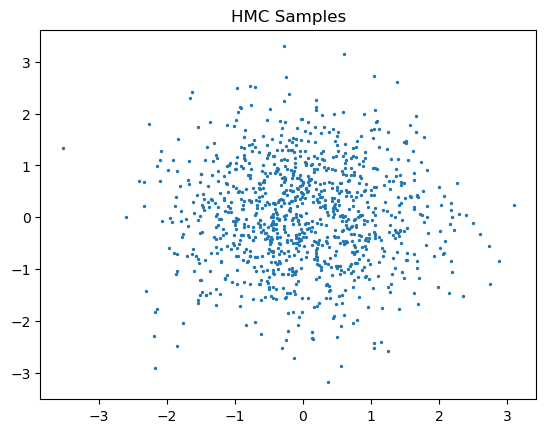

In [12]:
import numpy as np

# Define the potential energy function and its gradient
def potential_energy(z):
    # Example: Simple quadratic potential (can be replaced with more complex ones)
    return 0.5 * np.dot(z, z)

def gradient_potential_energy(z):
    # Gradient of the potential energy
    return z  # Derivative of 0.5 * ||z||^2 is just z

# Leapfrog update function
def leapfrog_step(z, r, epsilon, grad_potential_energy):
    # Half-step update for momentum
    r_half = r - 0.5 * epsilon * grad_potential_energy(z)
    
    # Full-step update for position
    z_new = z + epsilon * r_half
    
    # Second half-step update for momentum
    r_new = r_half - 0.5 * epsilon * grad_potential_energy(z_new)
    
    return z_new, r_new

# Resample momentum from the conditional distribution p(r | z)
def resample_momentum(z, temperature=1.0):
    # Sample momentum from a Gaussian distribution with mean 0 and variance 1
    # This is a simple choice for an independent Gaussian distribution
    r = np.random.normal(0, 1, size=z.shape)
    return r

# Hamiltonian Monte Carlo sampling
def hamiltonian_monte_carlo(z_init, num_samples, epsilon, L, potential_energy, gradient_potential_energy):
    samples = []
    z = z_init
    for _ in range(num_samples):
        r = resample_momentum(z)
        
        # Save the initial state to calculate acceptance later
        z_initial, r_initial = z.copy(), r.copy()
        
        # Perform L leapfrog steps
        for _ in range(L):
            z, r = leapfrog_step(z, r, epsilon, gradient_potential_energy)
        
        # Compute initial and final Hamiltonian (energy)
        initial_H = potential_energy(z_initial) + 0.5 * np.dot(r_initial, r_initial)
        final_H = potential_energy(z) + 0.5 * np.dot(r, r)
        
        # Accept or reject the new sample
        if np.random.rand() < np.exp(initial_H - final_H):
            samples.append(z)
        else:
            samples.append(z_initial)  # Reject the update, keep old sample
    
    return np.array(samples)

# Example usage
D = 2  # Dimension of the problem
z_init = np.random.randn(D)  # Initial position
num_samples = 1000  # Number of samples to generate
epsilon = 0.1  # Step size
L = 20  # Number of leapfrog steps

# Run HMC
samples = hamiltonian_monte_carlo(z_init, num_samples, epsilon, L, potential_energy, gradient_potential_energy)

# Visualization (for 2D case)
import matplotlib.pyplot as plt
plt.scatter(samples[:, 0], samples[:, 1], s=2)
plt.title("HMC Samples")
plt.show()


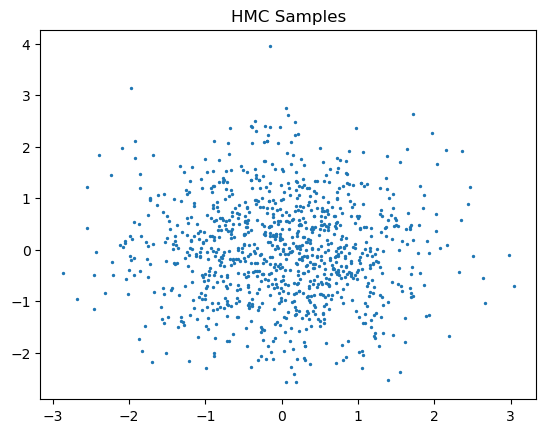

In [13]:
import random
import math

# Define the potential energy function and its gradient
def potential_energy(z):
    # Example: Simple quadratic potential (can be replaced with more complex ones)
    return 0.5 * sum(x ** 2 for x in z)

def gradient_potential_energy(z):
    # Gradient of the potential energy
    return z  # Derivative of 0.5 * ||z||^2 is just z

# Leapfrog update function
def leapfrog_step(z, r, epsilon, grad_potential_energy):
    # Half-step update for momentum
    r_half = [r_i - 0.5 * epsilon * grad_i for r_i, grad_i in zip(r, grad_potential_energy(z))]
    
    # Full-step update for position
    z_new = [z_i + epsilon * r_half_i for z_i, r_half_i in zip(z, r_half)]
    
    # Second half-step update for momentum
    r_new = [r_half_i - 0.5 * epsilon * grad_i for r_half_i, grad_i in zip(r_half, grad_potential_energy(z_new))]
    
    return z_new, r_new

# Resample momentum from the conditional distribution p(r | z)
def resample_momentum(z, temperature=1.0):
    # Sample momentum from a Gaussian distribution with mean 0 and variance 1
    r = [random.gauss(0, 1) for _ in z]
    return r

# Hamiltonian Monte Carlo sampling
def hamiltonian_monte_carlo(z_init, num_samples, epsilon, L, potential_energy, gradient_potential_energy):
    samples = []
    z = z_init
    for _ in range(num_samples):
        r = resample_momentum(z)
        
        # Save the initial state to calculate acceptance later
        z_initial, r_initial = list(z), list(r)
        
        # Perform L leapfrog steps
        for _ in range(L):
            z, r = leapfrog_step(z, r, epsilon, gradient_potential_energy)
        
        # Compute initial and final Hamiltonian (energy)
        initial_H = potential_energy(z_initial) + 0.5 * sum(r_i ** 2 for r_i in r_initial)
        final_H = potential_energy(z) + 0.5 * sum(r_i ** 2 for r_i in r)
        
        # Accept or reject the new sample
        if random.random() < math.exp(initial_H - final_H):
            samples.append(z)
        else:
            samples.append(z_initial)  # Reject the update, keep old sample
    
    return samples

# Example usage
D = 2  # Dimension of the problem
z_init = [random.gauss(0, 1) for _ in range(D)]  # Initial position
num_samples = 1000  # Number of samples to generate
epsilon = 0.1  # Step size
L = 20  # Number of leapfrog steps

# Run HMC
samples = hamiltonian_monte_carlo(z_init, num_samples, epsilon, L, potential_energy, gradient_potential_energy)

# Visualization (for 2D case)
import matplotlib.pyplot as plt
samples_x = [s[0] for s in samples]
samples_y = [s[1] for s in samples]
plt.scatter(samples_x, samples_y, s=2)
plt.title("HMC Samples")
plt.show()


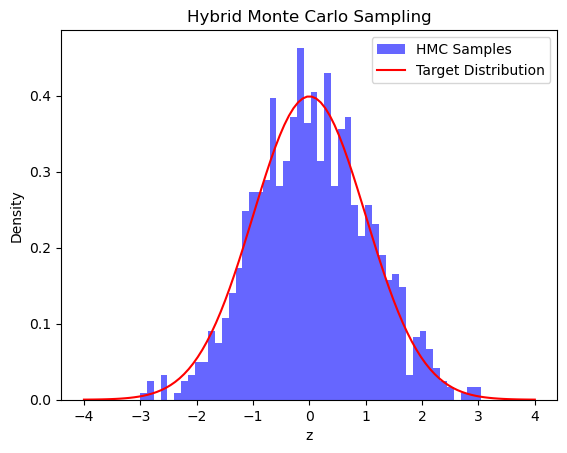

In [11]:
## Python Implementation

# Below is the Python implementation of the Hybrid Monte Carlo algorithm.


import numpy as np
import matplotlib.pyplot as plt

# Target potential energy function
def potential_energy(z):
    return 0.5 * z**2  # Example: Standard normal distribution

# Gradient of the potential energy
def grad_potential_energy(z):
    return z  # Gradient of 0.5 * z^2 is z

# Hamiltonian function
def hamiltonian(z, r):
    return potential_energy(z) + 0.5 * np.sum(r**2)

# Leapfrog integration
def leapfrog(z, r, grad_potential_energy, step_size, n_steps):
    r = r - 0.5 * step_size * grad_potential_energy(z)  # Half step for momentum
    for _ in range(n_steps - 1):
        z = z + step_size * r  # Full step for position
        r = r - step_size * grad_potential_energy(z)  # Full step for momentum
    z = z + step_size * r  # Final full step for position
    r = r - 0.5 * step_size * grad_potential_energy(z)  # Final half step for momentum
    return z, r

# Hybrid Monte Carlo algorithm
def hmc(initial_z, n_samples, step_size, n_steps):
    samples = []
    z = initial_z

    for _ in range(n_samples):
        r = np.random.normal(size=z.shape)  # Sample momentum
        z_new, r_new = leapfrog(z, r, grad_potential_energy, step_size, n_steps)
        
        # Metropolis acceptance criterion
        current_hamiltonian = hamiltonian(z, r)
        proposed_hamiltonian = hamiltonian(z_new, r_new)
        if np.random.rand() < np.exp(current_hamiltonian - proposed_hamiltonian):
            z = z_new  # Accept the proposal

        samples.append(z)

    return np.array(samples)

# Run HMC
initial_z = np.array([0.0])  # Initial position
n_samples = 1000
step_size = 0.1
n_steps = 10

samples = hmc(initial_z, n_samples, step_size, n_steps)

# Plot the results
plt.hist(samples, bins=50, density=True, alpha=0.6, color="blue", label="HMC Samples")
z_vals = np.linspace(-4, 4, 100)
plt.plot(z_vals, np.exp(-0.5 * z_vals**2) / np.sqrt(2 * np.pi), label="Target Distribution", color="red")
plt.title("Hybrid Monte Carlo Sampling")
plt.xlabel("z")
plt.ylabel("Density")
plt.legend()
plt.show()


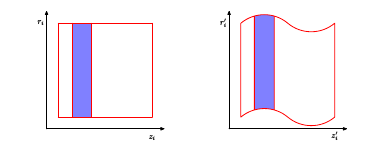

Fig.14 Each step of the leapfrog algorithm (11.64)–(11.66) modiﬁes either a position variable zi or a momentum variable ri . Because the change to one variable is a function only of the other, any region in phase space will be sheared without change of volume.

## Hybrid Monte Carlo

As we discussed in the previous section, for a nonzero step size $ \epsilon $, the discretization of the leapfrog algorithm will introduce errors into the integration of the Hamiltonian dynamical equations. **Hybrid Monte Carlo** (Duane et al., 1987; Neal, 1996) combines Hamiltonian dynamics with the Metropolis algorithm and thereby removes any bias associated with the discretization. Specifically, the algorithm uses a Markov chain consisting of alternate stochastic updates of the momentum variable $ r $ and Hamiltonian dynamical updates using the leapfrog algorithm. After each application of the leapfrog algorithm, the resulting candidate state is accepted or rejected according to the **Metropolis criterion** based on the value of the Hamiltonian $ H $.

Thus, if $ (z, r) $ is the initial state and $ (z', r') $ is the state after the leapfrog integration, then this candidate state is accepted with probability:

$$
\min \left(1, \exp\left(H(z, r) - H(z', r')\right)\right).
$$

If the leapfrog integration were to simulate the Hamiltonian dynamics perfectly, then every such candidate step would automatically be accepted because the value of $ H $ would be unchanged. Due to numerical errors, the value of $ H $ may sometimes decrease, and we would like the Metropolis criterion to remove any bias due to this effect and ensure that the resulting samples are indeed drawn from the required distribution.

In order for this to be the case, we need to ensure that the update equations corresponding to the leapfrog integration satisfy **detailed balance**:

$$
\int p(z, r) p(z', r') \, d(z', r') = \int p(z, r) p(z', r') \, d(z, r),
$$

This is easily achieved by modifying the leapfrog scheme as follows. Before the start of each leapfrog integration sequence, we choose at random, with equal probability, whether to integrate forwards in time (using step size $ \epsilon $) or backwards in time (using step size $ -\epsilon $).

We first note that the leapfrog integration scheme is **time-reversible**, so that integration for $ L $ steps using step size $ -\epsilon $ will exactly undo the effect of integration for $ L $ steps using step size $ \epsilon $. Next, we show that the leapfrog integration **preserves phase-space volume** exactly. This follows from the fact that each step in the leapfrog scheme updates either a $ z_i $ variable or an $ r_i $ variable by an amount that is a function only of the other variable. As shown in Fig.14, this has the effect of shearing a region of phase space while not altering its volume.

Finally, we use these results to show that detailed balance holds. Consider a small region $ R $ of phase space that, under a sequence of $ L $ leapfrog iterations of step size $ \epsilon $, maps to a region $ R' $. Using conservation of volume under the leapfrog iteration, we see that if $ R $ has volume $ \delta V $, then so too will $ R' $. If we choose an initial point from the distribution and then update it using $ L $ leapfrog interactions, the probability of the transition going from $ R $ to $ R' $ is given by:

$$
\frac{1}{2} \exp(-H(R)) \delta V \min \left(1, \exp(-H(R) + H(R'))\right),
$$

where the factor of $ \frac{1}{2} $ arises from the probability of choosing to integrate with a positive step size rather than a negative one. Similarly, the probability of starting in $ R' $ and integrating backwards in time to end up in $ R $ is given by:

$$
\frac{1}{2} \exp(-H(R')) \delta V \min \left(1, \exp(-H(R') + H(R))\right).
$$

It is easily seen that these two probabilities are equal, and hence **detailed balance holds**. Note that this proof ignores any overlap between the regions $ R $ and $ R' $, but it can be easily generalized to allow for such overlap.

### Time Reversibility and Phase-Space Volume

The leapfrog algorithm is time-reversible, meaning that applying the leapfrog integration forwards or backwards in time will yield the same results, thus ensuring that the integration preserves the volume of phase space. This characteristic is essential for the detailed balance of the algorithm.

---

### Hybrid Monte Carlo and Gaussian Distributions

Consider the application of the hybrid Monte Carlo algorithm to a multivariate Gaussian distribution. For convenience, consider a Gaussian distribution $ p(z) $ with independent components, for which the Hamiltonian is given by:

$$
H(z, r) = \frac{1}{2} \sum_i \left( \frac{z_i^2}{\sigma_i^2} + r_i^2 \right).
$$

During the leapfrog integration, each pair of phase-space variables $ z_i, r_i $ evolves independently. However, the acceptance or rejection of the candidate point is based on the value of $ H $, which depends on the values of all of the variables. Thus, a significant integration error in any one of the variables could lead to a high probability of rejection.

In order for the discrete leapfrog integration to be a reasonably good approximation to the true continuous-time dynamics, it is necessary for the leapfrog integration step size $ \epsilon $ to be smaller than the shortest length scale over which the potential is varying significantly. This is governed by the smallest value of $ \sigma_i $, which we denote by $ \sigma_{\text{min}} $.

Recall that the goal of the leapfrog integration in hybrid Monte Carlo is to move a substantial distance through phase space to a new state that is relatively independent of the initial state and still achieve a high probability of acceptance. In order to achieve this, the leapfrog integration must be continued for a number of iterations of order $ \frac{\sigma_{\text{max}}}{\sigma_{\text{min}}} $.

By contrast, consider the behavior of a simple Metropolis algorithm with an isotropic Gaussian proposal distribution of variance $ s^2 $. In order to avoid high rejection rates, the value of $ s $ must be of order $ \sigma_{\text{min}} $. The exploration of state space then proceeds by a random walk and takes of order $ \left( \frac{\sigma_{\text{max}}}{\sigma_{\text{min}}} \right)^2 $ steps to arrive at a roughly independent state.



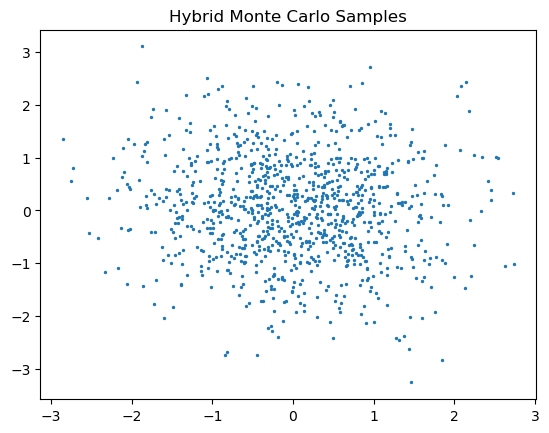

In [14]:
import random
import math

# Define the potential energy function and its gradient
def potential_energy(z):
    # Example: Simple quadratic potential (can be replaced with more complex ones)
    return 0.5 * sum(x ** 2 for x in z)

def gradient_potential_energy(z):
    # Gradient of the potential energy
    return z  # Derivative of 0.5 * ||z||^2 is just z

# Leapfrog update function
def leapfrog_step(z, r, epsilon, grad_potential_energy, direction=1):
    # Half-step update for momentum (direction controls forward or backward)
    r_half = [r_i - 0.5 * direction * epsilon * grad_i for r_i, grad_i in zip(r, grad_potential_energy(z))]
    
    # Full-step update for position
    z_new = [z_i + direction * epsilon * r_half_i for z_i, r_half_i in zip(z, r_half)]
    
    # Second half-step update for momentum
    r_new = [r_half_i - 0.5 * direction * epsilon * grad_i for r_half_i, grad_i in zip(r_half, grad_potential_energy(z_new))]
    
    return z_new, r_new

# Resample momentum from the conditional distribution p(r | z)
def resample_momentum(z):
    # Sample momentum from a Gaussian distribution with mean 0 and variance 1
    return [random.gauss(0, 1) for _ in z]

# Hamiltonian Monte Carlo sampling with Metropolis acceptance
def hybrid_monte_carlo(z_init, num_samples, epsilon, L, potential_energy, gradient_potential_energy):
    samples = []
    z = z_init
    for _ in range(num_samples):
        r = resample_momentum(z)
        
        # Save the initial state to calculate acceptance later
        z_initial, r_initial = list(z), list(r)
        
        # Randomly choose whether to integrate forwards or backwards in time
        direction = random.choice([1, -1])  # 1 for forward, -1 for backward
        
        # Perform L leapfrog steps
        for _ in range(L):
            z, r = leapfrog_step(z, r, epsilon, gradient_potential_energy, direction)
        
        # Compute initial and final Hamiltonian (energy)
        initial_H = potential_energy(z_initial) + 0.5 * sum(r_i ** 2 for r_i in r_initial)
        final_H = potential_energy(z) + 0.5 * sum(r_i ** 2 for r_i in r)
        
        # Accept or reject the new sample
        acceptance_prob = min(1, math.exp(initial_H - final_H))
        
        if random.random() < acceptance_prob:
            samples.append(z)
        else:
            samples.append(z_initial)  # Reject the update, keep old sample
    
    return samples

# Example usage
D = 2  # Dimension of the problem
z_init = [random.gauss(0, 1) for _ in range(D)]  # Initial position
num_samples = 1000  # Number of samples to generate
epsilon = 0.1  # Step size
L = 20  # Number of leapfrog steps

# Run HMC
samples = hybrid_monte_carlo(z_init, num_samples, epsilon, L, potential_energy, gradient_potential_energy)

# Visualization (for 2D case)
import matplotlib.pyplot as plt
samples_x = [s[0] for s in samples]
samples_y = [s[1] for s in samples]
plt.scatter(samples_x, samples_y, s=2)
plt.title("Hybrid Monte Carlo Samples")
plt.show()
